[MODERN PORTFOLIO THEORY](https://www.investopedia.com/terms/m/modernportfoliotheory.asp#:~:text=According%20to%20the%20theory%2C%20it's,by%20the%20Journal%20of%20Finance.)


### INSTALLS & IMPORTS

In [ ]:
!pip install simfin

In [ ]:
!set -ex
!pip uninstall -y cupy-cuda100
!pip install cupy-cuda100 --no-cache-dir

In [ ]:
!pip install scipy

In [ ]:
! pip install pandas_datareader

In [ ]:
# General Imports
import pandas as pd
import numpy as np
import os
import datetime as dt
import random
import time
import pandas_datareader.data as web

# Import the main functionality from the SimFin Python API.
import simfin as sf
from simfin.names import *

# Import scipy libraries
import scipy.optimize as optimize
import scipy.interpolate as sci

# Import Path
from pathlib import Path

# Imports for matplot Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab

# Imports for plotly visualizations
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Imports for google colab visualizations
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
from __future__ import print_function


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### GET SNP500 STOCK DATA

In [ ]:
%load_ext google.colab.data_table

In [ ]:
sf.set_data_dir('~/simfin_data/')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
# Use the Pathlib libary to set the path to the CSV
csvpath = Path("My Drive/Colab Notebooks/PROJECT 2/Data Sets/SNP500-Symbols.csv")

In [ ]:
# Data frame for S&P500 Symbols
sp = pd.read_csv(csvpath)

In [ ]:
sp.drop(['Unnamed: 0'], axis= 1, inplace=True)

In [ ]:
sp.head()

,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN


In [ ]:
sp_list = sp['Symbol'].values.tolist()

In [ ]:
%%time
df_prices = sf.load_shareprices(variant='daily', market='us')

Dataset "us-shareprices-daily" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
CPU times: user 21.9 s, sys: 3.07 s, total: 25 s
Wall time: 30.4 s


In [ ]:
# all the s&p500 stock daily values
df_snp500shares = df_prices
df_snp500shares.reset_index(inplace=True)
df_snp500shares.head()

,Ticker,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN
1,A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN
2,A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN
3,A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN
4,A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN


In [ ]:
df_snp500shares['SNP500'] = np.where(df_snp500shares['Ticker'].isin(sp_list), 1, 0)
df_snp500shares.head()

,Ticker,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding,SNP500
0,A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN,1
1,A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN,1
2,A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN,1
3,A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN,1
4,A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN,1


In [ ]:
df_snp500shares.shape

(5315592, 12)

In [ ]:
df_snp500shares.set_index(['SNP500'], inplace=True)

In [ ]:
df_snp500shares.head()

,Ticker,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
SNP500,,,,,,,,,,,
1,A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN
1,A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN
1,A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN
1,A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN
1,A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN


In [ ]:
df_snp500shares = df_snp500shares.loc[1]

In [ ]:
# FINAL SNP500 STOCK SHARES DATAFRAME
df_snp500shares.shape

(1352753, 11)

In [ ]:
# These are the 505 stocks within SNP500
df_snp500shares.head()

,Ticker,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
SNP500,,,,,,,,,,,
1,A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN
1,A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN
1,A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN
1,A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN
1,A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN


In [ ]:
df_snp500shares.reset_index(inplace=True)
df_snp500shares = df_snp500shares.drop(columns=['SNP500'])

In [ ]:
df_snp500shares.head()

,Ticker,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN
1,A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN
2,A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN
3,A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN
4,A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN


In [ ]:
df_snp500shares.set_index('Ticker', inplace=True)
df_snp500shares.head()

,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
Ticker,,,,,,,,,,
A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN
A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN
A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN
A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN
A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN


In [ ]:
data = df_snp500shares

In [ ]:
data.head()

,Date,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
Ticker,,,,,,,,,,
A,2007-01-03,45846,34.99,34.05,35.48,34.30,22.80,NaN,2574600,NaN
A,2007-01-04,45846,34.30,33.46,34.60,34.41,22.87,NaN,2073700,NaN
A,2007-01-05,45846,34.30,34.00,34.40,34.09,22.66,NaN,2676600,NaN
A,2007-01-08,45846,33.98,33.68,34.08,33.97,22.58,NaN,1557200,NaN
A,2007-01-09,45846,34.08,33.63,34.32,34.01,22.61,NaN,1386200,NaN


In [ ]:
data2 = data[['Date','Adj. Close']]

In [ ]:
data3 = data2.reset_index().set_index(['Date','Ticker']).unstack()

In [ ]:
data3.head()

Adj. Close                            ...                             
Ticker              A    AAL    AAP   AAPL ABBV  ... XYL    YUM    ZBH   ZION ZTS
Date                                             ...                             
2007-01-03      22.80  53.07  33.90  10.36  NaN  ... NaN  16.09  71.55  68.77 NaN
2007-01-04      22.87  55.46  34.12  10.59  NaN  ... NaN  16.05  73.15  69.08 NaN
2007-01-05      22.66  54.94  33.37  10.52  NaN  ... NaN  15.91  73.10  68.87 NaN
2007-01-08      22.58  54.60  33.48  10.57  NaN  ... NaN  15.87  72.63  68.99 NaN
2007-01-09      22.61  54.58  33.77  11.45  NaN  ... NaN  15.89  72.67  69.37 NaN

[5 rows x 456 columns]

### SIMULATION FUNCTION

In [ ]:
assets = ['AAPL', 'MMM', 'GE', 'PG', 'WMT']
num_assets = len(assets)
weights = np.random.dirichlet(np.ones(num_assets), size=1)
weights = weights[0]
print(weights)

[0.1750505  0.05890322 0.26666536 0.32862532 0.1707556 ]


In [ ]:
# PORTFOLIO SIMULATION FUNCTION
def portfolio_simulation(assets, iterations):
    '''
    Runs a simulation by randomly selecting portfolio weights a specified
    number of times (iterations), returns the list of results and plots 
    all the portfolios as well.
    
    Parameters:
    -----------  
        assets: list
            all the assets to use for the model.    
        iterations: int 
            the number of randomly generated portfolios to build.
    
    Returns:
    --------
        port_returns: array
            array of all the simulated portfolio returns.
        port_vols: array
            array of all the simulated portfolio volatilities.
    '''
    
    start = time.time()
    num_assets = len(assets)
    
    # Fetch data    
    adj_closes = data3['Adj. Close'][assets]
    returns = np.log(adj_closes / adj_closes.shift(1))
    returns.dropna(inplace=True)
    port_returns = []
    port_vols = []
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(num_assets),size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean() * weights) * 252)
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    
    # Convert lists to arrays
    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    # Plot the distribution of portfolio returns and volatilities 
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols,port_returns,c = (port_returns / port_vols), marker='o')
    plt.title('MARKOWITZ BULLET')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio')
    
    print('Elapsed Time: %.2f seconds' % (time.time() - start))
    
    return port_returns, port_vols

### MARKOWITZ BULLET

Elapsed Time: 4.68 seconds


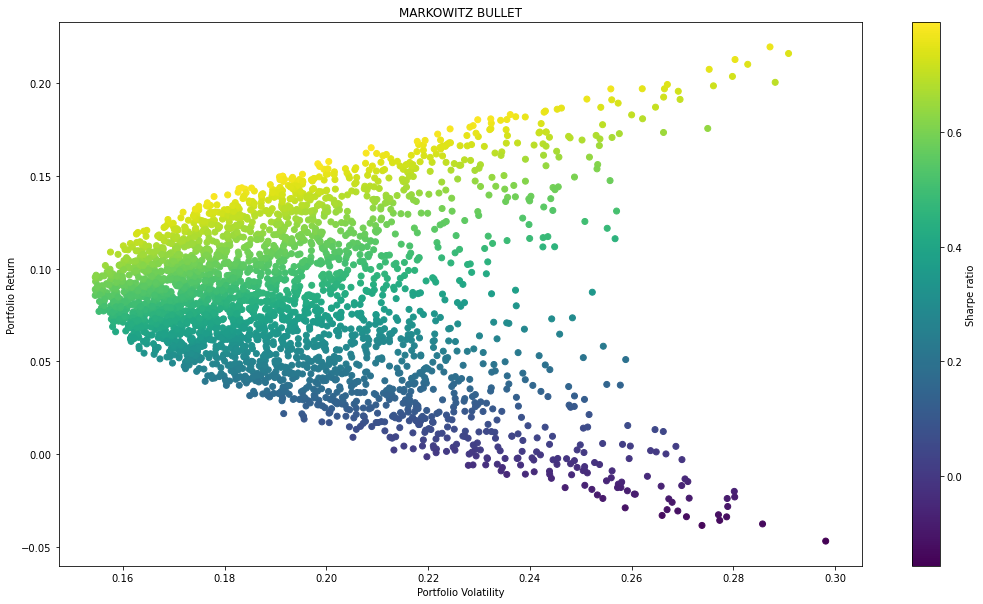

In [ ]:
# Define some assets for portfolio simulations
assets = ['AAPL', 'MMM', 'GE', 'PG', 'WMT']
port_returns, port_vols = portfolio_simulation(assets, 3000)

### PORTFOLIO STATISTICS
*   Returns - (Maximize)
*   Volatility (Risk) - (Minimize)
*   Sharpe Ratio - (Maximize)






In [ ]:
def portfolio_stats(weights, returns):
    
    '''
    We can gather the portfolio performance metrics for a specific set of weights.
    This function will be important because we'll want to pass it to an optmization
    function to get the portfolio with the best desired characteristics.
    
    Paramaters: 
    -----------
        weights: array, 
            asset weights in the portfolio.
        returns: dataframe
            a dataframe of returns for each asset in the trial portfolio    
    
    Returns: 
    --------
        dict of portfolio statistics - mean return, volatility, sharp ratio.
    '''

    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(returns.mean() * weights * 252)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() *252, weights)))
    sharpe = port_return/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}

### MINIMIZATION FUNCTIONS

In [ ]:
# Minimizing (-)ve Sharpe is same as maximizing (+)ve Sharpe
def minimize_sharpe(weights, returns):  
    return -portfolio_stats(weights, returns)['sharpe'] 

In [ ]:
# We want to minimize volatility
def minimize_volatility(weights, returns):  
    return portfolio_stats(weights, returns)['volatility'] 

In [ ]:
# Minimizing (-)ve return is same as maximizing (+)ve return
def minimize_return(weights, returns): 
    return -portfolio_stats(weights, returns)['return']

In [ ]:
adj_closes = data3['Adj. Close'][assets]

In [ ]:
returns = np.log(adj_closes / adj_closes.shift(1))
returns.dropna(inplace=True)

In [ ]:
num_assets = len(assets)
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets]

print (constraints)
print (bounds)
print (initializer)

{'type': 'eq', 'fun': <function <lambda> at 0x7faed083ce18>}
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
[0.2, 0.2, 0.2, 0.2, 0.2]


### OPTIMIZATION FUNCTION
*   CONSTRAINTS
*   BOUNDS
*   INITIALIZER





In [ ]:
optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 args = returns,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)
print(optimal_sharpe)

     fun: -0.8055585013992113
     jac: array([ 1.58920884e-05,  5.61986193e-02,  9.57546562e-01, -2.85506248e-05,
       -9.70065594e-06])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.15373018e-01, 5.81676304e-17, 0.00000000e+00, 1.85707720e-01,
       2.98919261e-01])


In [ ]:
# Optimal sharpe with ticker weights
optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(assets,list(optimal_sharpe_weights)))

[('AAPL', 0.5154), ('MMM', 0.0), ('GE', 0.0), ('PG', 0.1857), ('WMT', 0.2989)]

In [ ]:
optimal_stats = portfolio_stats(optimal_sharpe_weights, returns)
print(optimal_stats)

print('Optimal Portfolio Return: ', round(optimal_stats['return']*100,2))
print('Optimal Portfolio Volatility: ', round(optimal_stats['volatility']*100,2))
print('Optimal Portfolio Sharpe Ratio: ', round(optimal_stats['sharpe'],2))

{'return': 0.16399765492931218, 'volatility': 0.20358255160908528, 'sharpe': 0.8055585001420792}
Optimal Portfolio Return:  16.4
Optimal Portfolio Volatility:  20.36
Optimal Portfolio Sharpe Ratio:  0.81


In [ ]:
optimal_variance=optimize.minimize(minimize_volatility,
                                   initializer,
                                   args = returns,
                                   method = 'SLSQP',
                                   bounds = bounds,
                                   constraints = constraints)

print(optimal_variance)
optimal_variance_weights=optimal_variance['x'].round(4)
list(zip(assets,list(optimal_variance_weights)))

     fun: 0.15359462379539268
     jac: array([0.15307162, 0.15331287, 0.16585703, 0.15360542, 0.1537753 ])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([5.36788237e-02, 1.26073598e-01, 8.85318836e-18, 4.98029765e-01,
       3.22217813e-01])


[('AAPL', 0.0537),
 ('MMM', 0.1261),
 ('GE', 0.0),
 ('PG', 0.498),
 ('WMT', 0.3222)]

### EFFICIENT FRONTIER


*   MAXIMIZE RETURN FOR GIVEN LEVEL OF VOLATILITY
*   MINIMIZE VOLATILITY



In [ ]:
# Make an array of 50 returns between the minimum return and maximum return
# discovered earlier.
target_returns = np.linspace(port_returns.min(),port_returns.max(),50)

# Initialize optimization parameters
minimal_volatilities = []
bounds = tuple((0,1) for x in weights)
initializer = num_assets * [1./num_assets,]

for target_return in target_returns:
    
    constraints = ({'type':'eq','fun': lambda x: portfolio_stats(x,returns)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1})
       
    optimal = optimize.minimize(minimize_volatility,
                              initializer,
                              args = returns,
                              method = 'SLSQP',
                              bounds = bounds,
                              constraints = constraints)
    
    minimal_volatilities.append(optimal['fun'])

minimal_volatilities = np.array(minimal_volatilities)

In [ ]:
target_returns

In [ ]:
minimal_volatilities

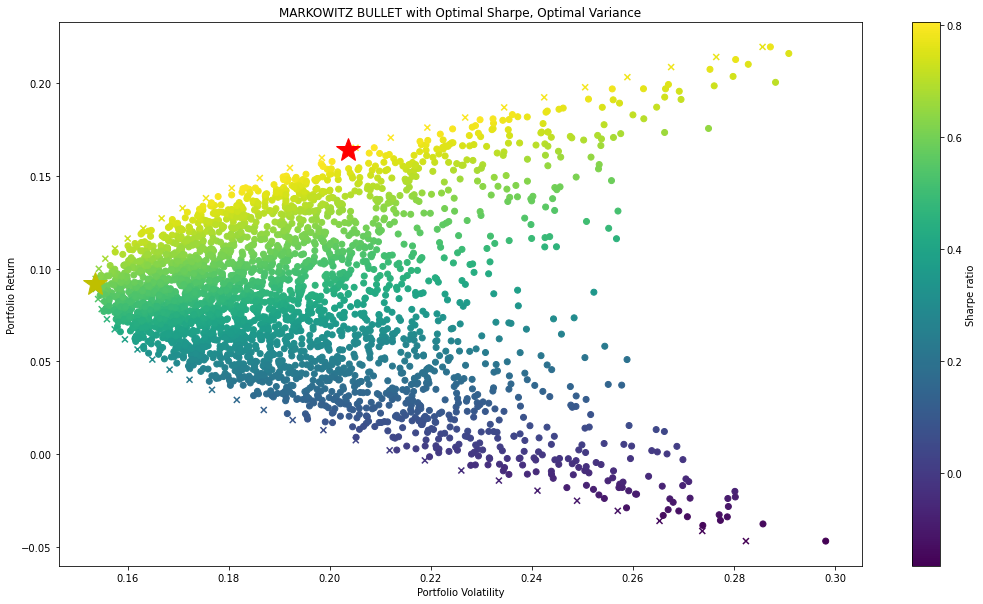

In [ ]:
# initialize figure size
plt.figure(figsize=(18,10))

plt.scatter(port_vols,
            port_returns,
            c = (port_returns / port_vols),
            marker = 'o')

plt.scatter(minimal_volatilities,
            target_returns,
            c = (target_returns / minimal_volatilities),
            marker = 'x')

plt.plot(portfolio_stats(optimal_sharpe_weights, returns)['volatility'],
         portfolio_stats(optimal_sharpe_weights, returns)['return'],
         'r*',
         markersize = 25.0)

plt.plot(portfolio_stats(optimal_variance_weights, returns)['volatility'],
         portfolio_stats(optimal_variance_weights, returns)['return'],
         'y*',
         markersize = 25.0)

plt.title('MARKOWITZ BULLET with Optimal Sharpe, Optimal Variance')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio')


### THE CAPITAL MARKET LINE

In [ ]:
# interpolate

min_index = np.argmin(minimal_volatilities)
ex_returns = target_returns[min_index:]
ex_volatilities = minimal_volatilities[min_index:]

var = sci.splrep(ex_returns, ex_volatilities)

def func(x):
    # Spline approximation of the efficient frontier
    spline_approx = sci.splev(x,var,der=0)  
    return spline_approx

def d_func(x):
    # first derivative of the approximate efficient frontier function
    deriv = sci.splev(x,var,der=1)
    return deriv

def eqs(p, rfr = 0.01):

    #rfr = risk free rate
    
    eq1 = rfr - p[0]
    eq2 = rfr + p[1] * p[2] - func(p[2])
    eq3=p[1] - d_func(p[2]) 
    return eq1, eq2, eq3

# Initializing the weights can be tricky - I find taking the half-way point between your max return and max
# variance typically yields good results.

rfr = 0.01
m=  port_vols.max() / 2
l = port_returns.max() / 2

optimal = optimize.fsolve(eqs, [rfr,m,l])
print(optimal)

[0.01       1.17932314 0.15844622]


In [ ]:
# check to see if the optimization function reduces all three equations to 0
np.round(eqs(optimal),4)

array([ 0., -0.,  0.])

### PLOT WITH TANGENT LINE

In [ ]:
constraints =(
    {'type':'eq','fun': lambda x: portfolio_stats(x,returns)['return']-func(optimal[2])},
    {'type':'eq','fun': lambda x: np.sum(x)-1},
    )

result = optimize.minimize(minimize_volatility,
                           initializer,
                           args = (returns,),
                           method = 'SLSQP',
                           bounds = bounds,
                           constraints = constraints)

optimal_weights = result['x'].round(3)

portfolio = list(zip(assets, list(optimal_weights)))
print(portfolio)

[('AAPL', 0.723), ('MMM', 0.0), ('GE', 0.0), ('PG', 0.004), ('WMT', 0.273)]
